In [ ]:

import pandas as pd
import numpy as np
from sklearn import tree, preprocessing
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
from scipy.stats import chi2_contingency

In [ ]:
allPollutantsAllYears = pd.DataFrame()

**Data Preprocessing**

In [ ]:
def processData(filename):
  # read file
  df2007 = pd.read_csv(filename, encoding="utf8")

  # Extract date,month and year from "Date Local"
  df2007['month'] = pd.DatetimeIndex(df2007['Date Local']).month
  df2007['day'] = pd.DatetimeIndex(df2007['Date Local']).day
  df2007['year'] = pd.DatetimeIndex(df2007['Date Local']).year
  #remove irrelevant columns
  df2007 = df2007.drop(columns='Method Code')
  df2007 = df2007.drop(columns=['Observation Percent'])
  # have state code in int type
  df2007['State Code'] = pd.to_numeric(df2007['State Code'])
  # encode event type
  le = preprocessing.LabelEncoder()
  df2007['Event Type'] = le.fit_transform(df2007['Event Type'])
  #Remove duplication and null values
  df2007 = df2007.dropna()
  df2007 = df2007.drop_duplicates()
  #extract only int or float type features
  df2007 = df2007.select_dtypes(exclude=['object'])
  return df2007

**Get data for all 5 pollutants**

In [ ]:
AQI_of_PM25 = pd.concat(
    map(processData, ['/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2000.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2001.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2002.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2003.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2004.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2005.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2006.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2007.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2008.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2009.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2010.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2011.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2012.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2013.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2014.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2015.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2016.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2017.csv'
                      ]), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/p

In [ ]:
AQI_of_PM25['Parameter'] = "PM2.5"

In [ ]:
AQI_of_SO2 = pd.concat(
    map(processData, ['/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2000.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2001.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2002.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2003.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2004.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2005.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2006.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2007.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2008.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2009.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2010.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2011.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2012.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2013.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2014.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2015.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2016.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2017.csv'
                      ]), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.


In [ ]:
AQI_of_SO2['Parameter'] = "SO2"

In [ ]:
AQI_of_CO = pd.concat(
    map(processData, ['/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2000.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2001.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2002.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2003.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2004.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2005.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2006.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2007.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2008.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2009.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2010.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2011.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2012.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2013.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2014.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2015.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2016.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2017.csv'
                      ]), ignore_index=True)
AQI_of_CO['Parameter'] = "CO"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.


In [ ]:
AQI_of_NO2 = pd.concat(
    map(processData, ['/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2000.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2001.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2002.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2003.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2004.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2005.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2006.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2007.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2008.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2009.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2010.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2011.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2012.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2013.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2014.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2015.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2016.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2017.csv'
                      ]), ignore_index=True)
AQI_of_NO2['Parameter'] = "NO2"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.


In [ ]:
AQI_of_Ozone = pd.concat(
    map(processData, ['/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2000.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2001.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2002.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2003.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2004.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2005.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2006.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2007.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2008.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2009.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2010.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2011.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2012.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2013.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2014.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2015.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2016.csv',
                      '/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2017.csv'
                      ]), ignore_index=True)
AQI_of_Ozone['Parameter'] = "Ozone"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/li

**Merge All 5 pollutant data**

In [ ]:
newresult = pd.concat([AQI_of_PM25, AQI_of_SO2, AQI_of_CO, AQI_of_NO2, AQI_of_Ozone], ignore_index=True)
newresult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15259219 entries, 0 to 15259218
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   State Code         int64  
 1   County Code        int64  
 2   Site Num           int64  
 3   Parameter Code     int64  
 4   POC                int64  
 5   Latitude           float64
 6   Longitude          float64
 7   Event Type         int64  
 8   Observation Count  int64  
 9   Arithmetic Mean    float64
 10  1st Max Value      float64
 11  1st Max Hour       int64  
 12  AQI                float64
 13  month              int64  
 14  day                int64  
 15  year               int64  
 16  Parameter          object 
dtypes: float64(5), int64(11), object(1)
memory usage: 1.9+ GB


**Pick pollutant with highest AQI for each day per site**

In [ ]:
result = newresult.groupby(['State Code','County Code', 'Site Num','year','month','day']).agg({"AQI":['max']})
result.columns = ['AQI']
result = result.reset_index()
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8742729 entries, 0 to 8742728
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   State Code   int64  
 1   County Code  int64  
 2   Site Num     int64  
 3   year         int64  
 4   month        int64  
 5   day          int64  
 6   AQI          float64
dtypes: float64(1), int64(6)
memory usage: 466.9 MB


***Map AQI to Quality***

In [ ]:
def checkQuality(row):
  if row['AQI'] >= 0 and  row['AQI'] <= 50:
    return'Good'
  elif row['AQI'] >= 51 and  row['AQI'] <= 100:
    return'Moderate'
  elif row['AQI'] >= 101 and  row['AQI'] <= 150:
    return'Unhealthy for Sensitive Group'
  elif row['AQI'] >= 151 and row['AQI'] <= 200:
    return'Unhealthy'
  elif row['AQI'] >= 201 and  row['AQI'] <= 300:
    return'Very Unhealthy'
  elif row['AQI'] >= 301 and  row['AQI'] <= 500:
    return'Hazardous'

In [ ]:
result['Quality'] = result.apply(lambda row: checkQuality(row), axis=1)

In [ ]:
result

,State Code,County Code,Site Num,year,month,day,AQI,Quality
0,1,3,10,2000,1,16,25.0,Good
1,1,3,10,2000,1,19,46.0,Good
2,1,3,10,2000,1,22,36.0,Good
3,1,3,10,2000,1,25,26.0,Good
4,1,3,10,2000,1,28,32.0,Good
...,...,...,...,...,...,...,...,...
8742724,72,127,9,2005,12,27,17.0,Good
8742725,72,127,9,2005,12,28,15.0,Good
8742726,72,127,9,2005,12,29,14.0,Good
8742727,72,127,9,2005,12,30,15.0,Good


**Merge data above with census Details**

In [ ]:
populationInfo = pd.read_csv("/content/drive/MyDrive/FA21 CMPE 255 Term Project/co-est2020.csv",encoding="ISO-8859-1")
populationInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SUMLEV             3194 non-null   int64 
 1   REGION             3194 non-null   int64 
 2   DIVISION           3194 non-null   int64 
 3   STATE              3194 non-null   int64 
 4   COUNTY             3194 non-null   int64 
 5   STNAME             3194 non-null   object
 6   CTYNAME            3194 non-null   object
 7   CENSUS2010POP      3194 non-null   object
 8   ESTIMATESBASE2010  3194 non-null   int64 
 9   POPESTIMATE2010    3194 non-null   int64 
 10  POPESTIMATE2011    3194 non-null   int64 
 11  POPESTIMATE2012    3194 non-null   int64 
 12  POPESTIMATE2013    3194 non-null   int64 
 13  POPESTIMATE2014    3194 non-null   int64 
 14  POPESTIMATE2015    3194 non-null   int64 
 15  POPESTIMATE2016    3194 non-null   int64 
 16  POPESTIMATE2017    3194 non-null   int64 


In [ ]:
merged_df = result.merge(populationInfo, how='inner', left_on=["State Code", "County Code"], right_on=["STATE", "COUNTY"])
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8707954 entries, 0 to 8707953
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   State Code         int64  
 1   County Code        int64  
 2   Site Num           int64  
 3   year               int64  
 4   month              int64  
 5   day                int64  
 6   AQI                float64
 7   Quality            object 
 8   SUMLEV             int64  
 9   REGION             int64  
 10  DIVISION           int64  
 11  STATE              int64  
 12  COUNTY             int64  
 13  STNAME             object 
 14  CTYNAME            object 
 15  CENSUS2010POP      object 
 16  ESTIMATESBASE2010  int64  
 17  POPESTIMATE2010    int64  
 18  POPESTIMATE2011    int64  
 19  POPESTIMATE2012    int64  
 20  POPESTIMATE2013    int64  
 21  POPESTIMATE2014    int64  
 22  POPESTIMATE2015    int64  
 23  POPESTIMATE2016    int64  
 24  POPESTIMATE2017    int64  
 25  POPESTIMATE2018   

,State Code,County Code,Site Num,year,month,day,AQI,Quality,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE042020,POPESTIMATE2020
0,1,3,10,2000,1,16,25.0,Good,50,3,6,1,3,Alabama,Baldwin County,182265,182263,183121,186579,190203,194978,199306,203101,207787,212737,218071,223565,227989,229287
1,1,3,10,2000,1,19,46.0,Good,50,3,6,1,3,Alabama,Baldwin County,182265,182263,183121,186579,190203,194978,199306,203101,207787,212737,218071,223565,227989,229287
2,1,3,10,2000,1,22,36.0,Good,50,3,6,1,3,Alabama,Baldwin County,182265,182263,183121,186579,190203,194978,199306,203101,207787,212737,218071,223565,227989,229287
3,1,3,10,2000,1,25,26.0,Good,50,3,6,1,3,Alabama,Baldwin County,182265,182263,183121,186579,190203,194978,199306,203101,207787,212737,218071,223565,227989,229287
4,1,3,10,2000,1,28,32.0,Good,50,3,6,1,3,Alabama,Baldwin County,182265,182263,183121,186579,190203,194978,199306,203101,207787,212737,218071,223565,227989,229287


In [ ]:
merged_df['Population'] = 0
for i in range(0,len(merged_df)):
  if merged_df.at[i,'year'] == 2018:
    merged_df.at[i,'Population'] = merged_df.at[i,'POPESTIMATE2018']
  elif merged_df.at[i,'year'] == 2019:
    merged_df.at[i,'Population'] = merged_df.at[i,'POPESTIMATE2019']
  elif merged_df.at[i,'year'] == 2020:
    merged_df.at[i,'Population'] = merged_df.at[i,'POPESTIMATE2020']
  elif merged_df.at[i,'year'] == 2010:
    merged_df.at[i,'Population'] = merged_df.at[i,'POPESTIMATE2010']
  elif merged_df.at[i,'year'] == 2011:
    merged_df.at[i,'Population'] = merged_df.at[i,'POPESTIMATE2011']
  elif merged_df.at[i,'year'] == 2012:
    merged_df.at[i,'Population'] = merged_df.at[i,'POPESTIMATE2012']
  elif merged_df.at[i,'year'] == 2013:
    merged_df.at[i,'Population'] = merged_df.at[i,'POPESTIMATE2013']
  elif merged_df.at[i,'year'] == 2014:
    merged_df.at[i,'Population'] = merged_df.at[i,'POPESTIMATE2014']
  elif merged_df.at[i,'year'] == 2015:
    merged_df.at[i,'Population'] = merged_df.at[i,'POPESTIMATE2015']
  elif merged_df.at[i,'year'] == 2016:
    merged_df.at[i,'Population'] = merged_df.at[i,'POPESTIMATE2016']
  elif merged_df.at[i,'year'] == 2017:
    merged_df.at[i,'Population'] = merged_df.at[i,'POPESTIMATE2017']
  else:
    merged_df.at[i,'Population'] = merged_df.at[i,'POPESTIMATE2010']

In [ ]:
merged_df = merged_df[['State Code', 'County Code', 'year', 'month', 'AQI', 'Quality','STNAME', 'CTYNAME', 'Population', 'Site Num']]
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8707954 entries, 0 to 8707953
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   State Code   int64  
 1   County Code  int64  
 2   year         int64  
 3   month        int64  
 4   AQI          float64
 5   Quality      object 
 6   STNAME       object 
 7   CTYNAME      object 
 8   Population   int64  
 9   Site Num     int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 1.0+ GB


**Merge above data with Site description**

In [ ]:
siteInfo = pd.read_csv("/content/drive/MyDrive/FA21 CMPE 255 Term Project/aqs_sites.csv")
siteInfo['State Code'].unique()

array(['01', '02', '04', '05', '06', '08', '09', '10', '11', '12', '13',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48',
       '49', '50', '51', '53', '54', '55', '56', '66', '72', '78', '80',
       'CC'], dtype=object)

In [ ]:
siteInfo = siteInfo[siteInfo['State Code'] != 'CC']
siteInfo['State Code'].unique()

array(['01', '02', '04', '05', '06', '08', '09', '10', '11', '12', '13',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48',
       '49', '50', '51', '53', '54', '55', '56', '66', '72', '78', '80'],
      dtype=object)

In [ ]:
siteInfo['State Code'] = pd.to_numeric(siteInfo['State Code'])
siteInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20726 entries, 0 to 20725
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State Code             20726 non-null  int64  
 1   County Code            20726 non-null  int64  
 2   Site Number            20726 non-null  int64  
 3   Latitude               20720 non-null  float64
 4   Longitude              20721 non-null  float64
 5   Datum                  20726 non-null  object 
 6   Elevation              20726 non-null  float64
 7   Land Use               19583 non-null  object 
 8   Location Setting       19715 non-null  object 
 9   Site Established Date  20726 non-null  object 
 10  Site Closed Date       15813 non-null  object 
 11  Met Site State Code    350 non-null    float64
 12  Met Site County Code   350 non-null    float64
 13  Met Site Site Number   350 non-null    float64
 14  Met Site Type          2033 non-null   object 
 15  Me

In [ ]:
merged_df = pd.merge(merged_df,siteInfo[['State Code', 'County Code','Site Number','Land Use', 'Location Setting']], how='inner', left_on=["State Code", "County Code", "Site Num"], right_on=["State Code", "County Code", "Site Number"])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8707954 entries, 0 to 8707953
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   State Code        int64  
 1   County Code       int64  
 2   year              int64  
 3   month             int64  
 4   AQI               float64
 5   Quality           object 
 6   STNAME            object 
 7   CTYNAME           object 
 8   Population        int64  
 9   Site Num          int64  
 10  Site Number       int64  
 11  Land Use          object 
 12  Location Setting  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 930.1+ MB


In [ ]:
merged_df = merged_df.drop_duplicates()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5680519 entries, 0 to 8707951
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   State Code        int64  
 1   County Code       int64  
 2   year              int64  
 3   month             int64  
 4   AQI               float64
 5   Quality           object 
 6   STNAME            object 
 7   CTYNAME           object 
 8   Population        int64  
 9   Site Num          int64  
 10  Site Number       int64  
 11  Land Use          object 
 12  Location Setting  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 606.7+ MB


In [ ]:
merged_df = merged_df.dropna()

In [ ]:
merged_df

,State Code,County Code,year,month,AQI,Quality,STNAME,CTYNAME,Population,Site Num,Site Number,Land Use,Location Setting
0,1,3,2000,1,25.0,Good,Alabama,Baldwin County,183121,10,10,COMMERCIAL,SUBURBAN
1,1,3,2000,1,46.0,Good,Alabama,Baldwin County,183121,10,10,COMMERCIAL,SUBURBAN
2,1,3,2000,1,36.0,Good,Alabama,Baldwin County,183121,10,10,COMMERCIAL,SUBURBAN
3,1,3,2000,1,26.0,Good,Alabama,Baldwin County,183121,10,10,COMMERCIAL,SUBURBAN
4,1,3,2000,1,32.0,Good,Alabama,Baldwin County,183121,10,10,COMMERCIAL,SUBURBAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8707942,56,41,2017,12,39.0,Good,Wyoming,Uinta County,20449,101,101,AGRICULTURAL,RURAL
8707945,56,41,2017,12,40.0,Good,Wyoming,Uinta County,20449,101,101,AGRICULTURAL,RURAL
8707949,56,41,2017,12,41.0,Good,Wyoming,Uinta County,20449,101,101,AGRICULTURAL,RURAL
8707950,56,41,2017,12,42.0,Good,Wyoming,Uinta County,20449,101,101,AGRICULTURAL,RURAL


**Extract Data for analysis**

In [ ]:
dataForAnalysis = merged_df.drop(columns=['State Code','County Code','Site Num'])

In [ ]:
dataForAnalysis

,year,month,AQI,Quality,STNAME,CTYNAME,Population,Site Number,Land Use,Location Setting
0,2000,1,25.0,Good,Alabama,Baldwin County,183121,10,COMMERCIAL,SUBURBAN
1,2000,1,46.0,Good,Alabama,Baldwin County,183121,10,COMMERCIAL,SUBURBAN
2,2000,1,36.0,Good,Alabama,Baldwin County,183121,10,COMMERCIAL,SUBURBAN
3,2000,1,26.0,Good,Alabama,Baldwin County,183121,10,COMMERCIAL,SUBURBAN
4,2000,1,32.0,Good,Alabama,Baldwin County,183121,10,COMMERCIAL,SUBURBAN
...,...,...,...,...,...,...,...,...,...,...
8707942,2017,12,39.0,Good,Wyoming,Uinta County,20449,101,AGRICULTURAL,RURAL
8707945,2017,12,40.0,Good,Wyoming,Uinta County,20449,101,AGRICULTURAL,RURAL
8707949,2017,12,41.0,Good,Wyoming,Uinta County,20449,101,AGRICULTURAL,RURAL
8707950,2017,12,42.0,Good,Wyoming,Uinta County,20449,101,AGRICULTURAL,RURAL


**Checked if Nominal mat provides any information**

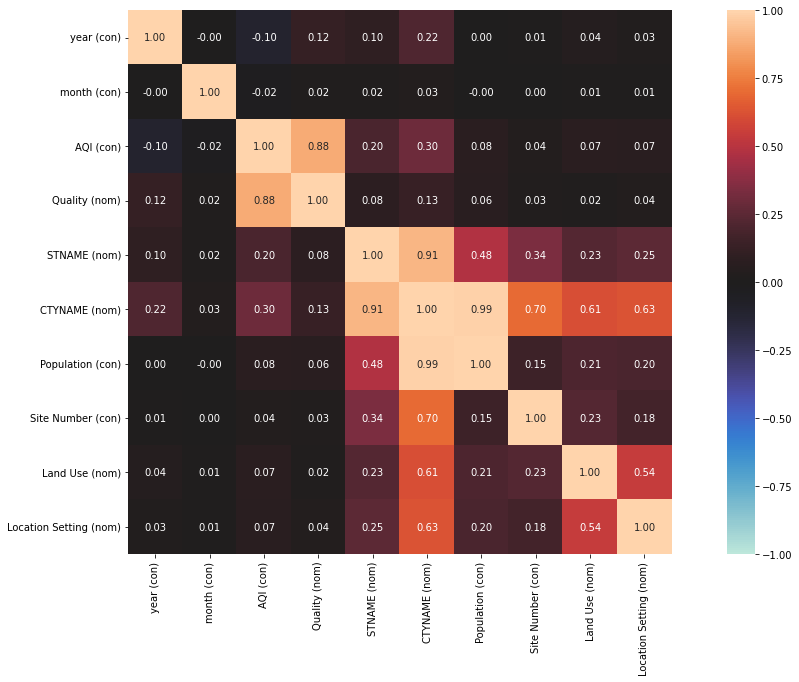

In [ ]:
!pip install dython
from dython import nominal
nominal.associations(dataForAnalysis,figsize=(20,10),mark_columns=True);

**Type of days based on Location settings over 18 years**

In [ ]:
all_merged_df = dataForAnalysis.groupby(['year','Location Setting','Quality']).size().unstack(fill_value=0)
all_merged_df = all_merged_df .reset_index()
all_merged_df

Quality,year,Location Setting,Good,Hazardous,Moderate,Unhealthy,Unhealthy for Sensitive Group,Very Unhealthy
0,2000,RURAL,63836,0,21289,1422,6213,118
1,2000,SUBURBAN,86552,0,38819,1645,7425,177
2,2000,URBAN AND CENTER CITY,66620,0,28464,671,3499,60
3,2001,RURAL,65433,0,22305,1529,6487,122
4,2001,SUBURBAN,91012,0,39125,1857,7650,196
5,2001,URBAN AND CENTER CITY,68819,0,28713,697,3619,67
6,2002,RURAL,66141,0,20831,2667,7006,301
7,2002,SUBURBAN,94614,0,37147,2869,8022,377
8,2002,URBAN AND CENTER CITY,67339,0,27284,1064,3579,91
9,2003,RURAL,67481,0,21711,1182,5360,162


In [ ]:
all_merged_df = dataForAnalysis.groupby(['Location Setting','Quality']).size().unstack(fill_value=0)
all_merged_df = all_merged_df .reset_index()
all_merged_df

Quality,Location Setting,Good,Hazardous,Moderate,Unhealthy,Unhealthy for Sensitive Group,Very Unhealthy
0,RURAL,1291483,2,357966,14405,69959,1065
1,SUBURBAN,1704944,0,554831,16899,83062,1687
2,URBAN AND CENTER CITY,1131234,7,378157,6453,36976,438


**Association analysis between air quality and location setting**

H0: The features Quality and Location Setting  are NOT dependent (which means they are not associated).

H1: The features Quality and Location Setting  are  dependent (which means they are  associated).

In [ ]:
location_data_crosstab = pd.crosstab(dataForAnalysis['Quality'], 
                             dataForAnalysis['Location Setting'],  
                               margins = False) 
print(location_data_crosstab) 

Location Setting                 RURAL  SUBURBAN  URBAN AND CENTER CITY
Quality                                                                
Good                           1291483   1704944                1131234
Hazardous                            2         0                      7
Moderate                        357966    554831                 378157
Unhealthy                        14405     16899                   6453
Unhealthy for Sensitive Group    69959     83062                  36976
Very Unhealthy                    1065      1687                    438


In [ ]:
chi, pval, dof, exp = chi2_contingency(location_data_crosstab)
print('\033[1m' +"The Chi-Square Statistic Value is ",chi)
print('\033[1m' +"The p-Value is ",pval)
print('\033[1m' +"The degree of fredom is ",dof)
print(exp)

The Chi-Square Statistic Value is  15903.731340916573
The p-Value is  0.0
The degree of fredom is  10
[[1.26752993e+06 1.72529185e+06 1.13483922e+06]
 [2.76373698e+00 3.76184639e+00 2.47441663e+00]
 [3.96428590e+05 5.39596739e+05 3.54928672e+05]
 [1.15944908e+04 1.57817816e+04 1.03807276e+04]
 [5.83446372e+04 7.94155032e+04 5.22368596e+04]
 [9.79591218e+02 1.33336555e+03 8.77043227e+02]]


In [ ]:
significance = 0.05

print(pval)
print('\033[1m' +'p-value=%.6f, significance=%.2f\n' % (pval, significance))
if pval < significance:
    print('\033[1m' +"""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print('\033[1m' +"""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

0.0
p-value=0.000000, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


**Association analysis between air quality and population**


In [ ]:
all_merged_df = dataForAnalysis.groupby(['year','STNAME','CTYNAME','Population','Quality']).size().unstack(fill_value=0)
all_merged_df.reset_index()

Quality,year,STNAME,CTYNAME,Population,Good,Hazardous,Moderate,Unhealthy,Unhealthy for Sensitive Group,Very Unhealthy
0,2000,Alabama,Baldwin County,183121,94,0,70,9,27,1
1,2000,Alabama,Colbert County,54527,34,0,60,0,2,0
2,2000,Alabama,DeKalb County,71133,171,0,123,3,52,0
3,2000,Alabama,Elmore County,79558,93,0,53,2,29,0
4,2000,Alabama,Etowah County,104440,16,0,54,0,7,0
...,...,...,...,...,...,...,...,...,...,...
14246,2017,Wyoming,Natrona County,79622,418,0,76,0,3,0
14247,2017,Wyoming,Sheridan County,30222,219,0,37,1,6,0
14248,2017,Wyoming,Sweetwater County,43663,773,0,81,0,3,0
14249,2017,Wyoming,Teton County,23383,525,0,63,0,1,0


**Pearson method**

In [ ]:
dataForAnalysis['AQI'].corr(dataForAnalysis['Population'])

0.07622399399552501

**kendall method**

In [ ]:
dataForAnalysis['AQI'].corr(dataForAnalysis['Population'],method='kendall')

0.027022474949591913

**spearman method**

In [ ]:
dataForAnalysis['AQI'].corr(dataForAnalysis['Population'],method='spearman')

0.040380137885003685

This is a positive corelation between Air Quality Index and Polpulation. However , The strength is small.

**Association analysis between air quality and land use** 

H0: The features Quality and Land Use are NOT dependent (which means they are not associated).

H1: The features Quality and Land Use are  dependent (which means they are  associated).

In [ ]:
all_merged_df = dataForAnalysis.groupby(['year','Quality','Land Use']).size().unstack(fill_value=0)
all_merged_df = all_merged_df .reset_index()
all_merged_df

Land Use,year,Quality,AGRICULTURAL,BLIGHTED AREAS,COMMERCIAL,DESERT,FOREST,INDUSTRIAL,MILITARY RESERVATION,MOBILE,RESIDENTIAL
0,2000,Good,28978,198,60167,2085,13804,21600,510,4367,85299
1,2000,Moderate,9760,70,23422,1040,4401,10166,194,1284,38235
2,2000,Unhealthy,728,1,743,30,315,309,11,123,1478
3,2000,Unhealthy for Sensitive Group,2955,3,3648,246,1397,2146,31,314,6397
4,2000,Very Unhealthy,66,0,82,0,13,22,1,3,168
...,...,...,...,...,...,...,...,...,...,...,...
89,2017,Hazardous,0,0,1,0,0,0,0,0,1
90,2017,Moderate,6523,121,14089,1678,2951,4894,202,1221,22984
91,2017,Unhealthy,36,1,300,10,79,63,3,21,546
92,2017,Unhealthy for Sensitive Group,530,10,1333,178,302,460,18,115,2286


In [ ]:
landuse_data_crosstab = pd.crosstab(dataForAnalysis['Quality'], 
                             dataForAnalysis['Land Use'],  
                               margins = False) 
print(landuse_data_crosstab) 

Land Use                       AGRICULTURAL  ...  RESIDENTIAL
Quality                                      ...             
Good                                 564595  ...      1676616
Hazardous                                 0  ...            1
Moderate                             155964  ...       558748
Unhealthy                              5733  ...        15857
Unhealthy for Sensitive Group         30528  ...        77590
Very Unhealthy                          460  ...         1497

[6 rows x 9 columns]


In [ ]:
chi, pval, dof, exp = chi2_contingency(location_data_crosstab)
print('\033[1m' +"The Chi-Square Statistic Value is ",chi)
print('\033[1m' +"The p-Value is ",pval)
print('\033[1m' +"The degree of fredom is ",dof)
print(exp)

The Chi-Square Statistic Value is  15903.731340916573
The p-Value is  0.0
The degree of fredom is  10
[[1.26752993e+06 1.72529185e+06 1.13483922e+06]
 [2.76373698e+00 3.76184639e+00 2.47441663e+00]
 [3.96428590e+05 5.39596739e+05 3.54928672e+05]
 [1.15944908e+04 1.57817816e+04 1.03807276e+04]
 [5.83446372e+04 7.94155032e+04 5.22368596e+04]
 [9.79591218e+02 1.33336555e+03 8.77043227e+02]]


In [ ]:
significance = 0.05

print(pval)
print('\033[1m' +'p-value=%.6f, significance=%.2f\n' % (pval, significance))
if pval < significance:
    print('\033[1m' +"""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print('\033[1m' +"""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

0.0
p-value=0.000000, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.
